<a href="https://colab.research.google.com/github/pepperamy/others/blob/main/quali_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import collections
from gensim.models import Word2Vec

In [ ]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
#import keras 

In [ ]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',index_col=False)

In [ ]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 10)

In [ ]:
df[(df['Review Text'].isnull()) & (df['Title'].isnull())].shape

(844, 10)

In [ ]:
df = df.dropna(subset= ['Review Text','Title'])

In [ ]:
df.shape

(19675, 10)



```
# This is formatted as code
```

# EDA


In [ ]:
df.groupby(['Division Name', 'Department Name', 'Class Name']).size()

Division Name   Department Name  Class Name    
General         Bottoms          Casual bottoms       1
                                 Jeans              659
                                 Pants              698
                                 Shorts             260
                                 Skirts             503
                Dresses          Dresses           3165
                Jackets          Jackets            333
                                 Outerwear          214
                Tops             Blouses           1683
                                 Fine gauge         579
                                 Knits             2708
                                 Sweaters           773
                Trend            Trend               88
General Petite  Bottoms          Jeans              311
                                 Pants              459
                                 Skirts             293
                Dresses          Dresses           2206


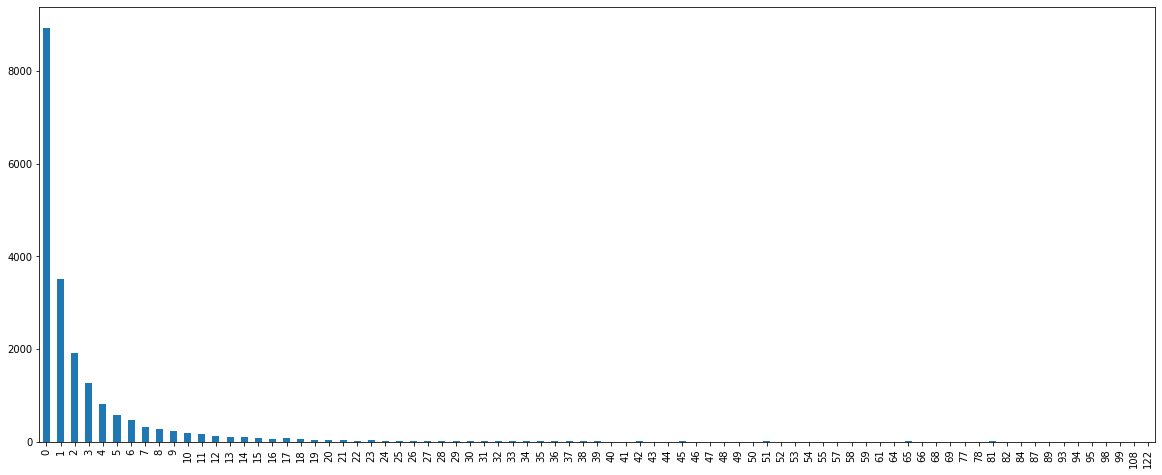

In [ ]:
df['Positive Feedback Count'].value_counts().sort_index().plot(kind='bar',figsize=(20,8))

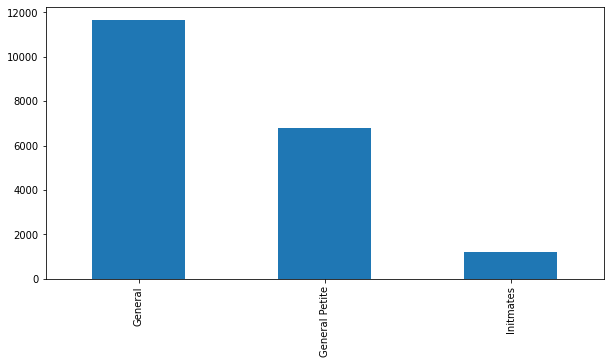

In [ ]:
df['Division Name'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))

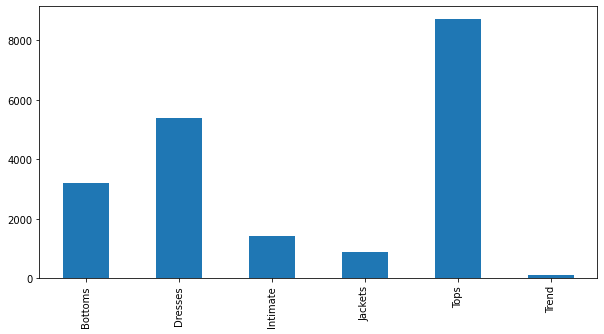

In [ ]:
df['Department Name'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))

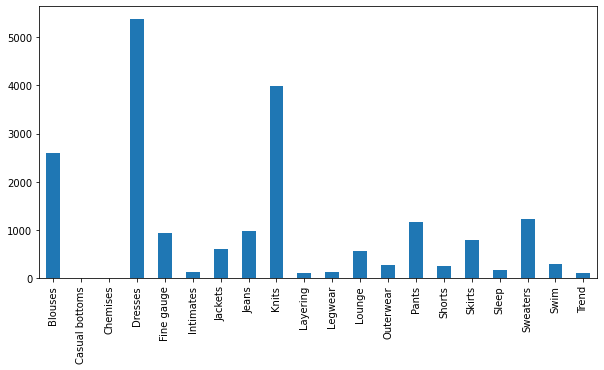

In [ ]:
df['Class Name'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))

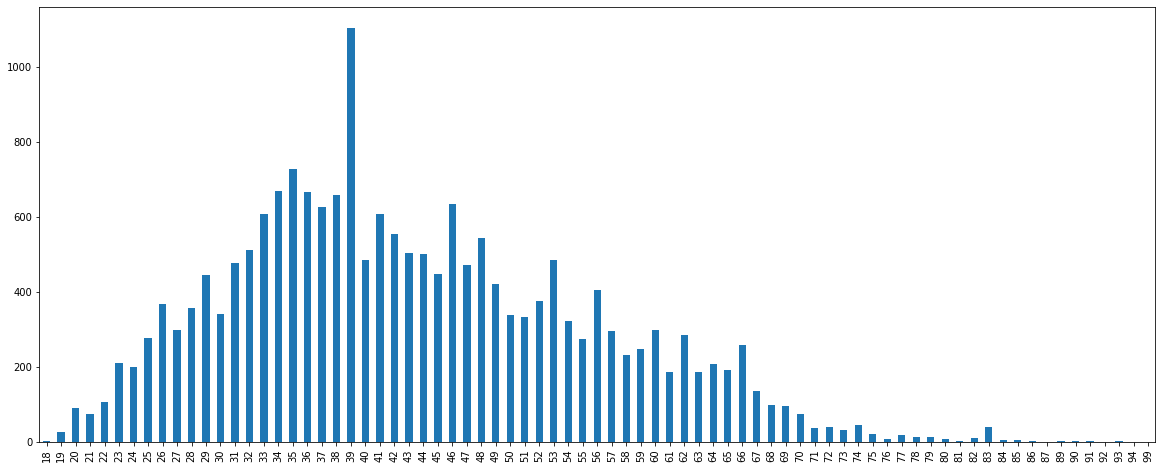

In [ ]:
df['Age'].value_counts().sort_index().plot(kind='bar',figsize=(20,8))

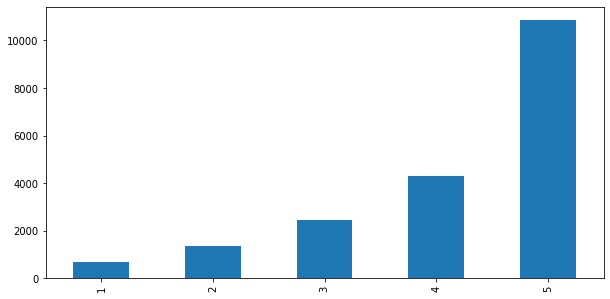

In [ ]:
df['Rating'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))

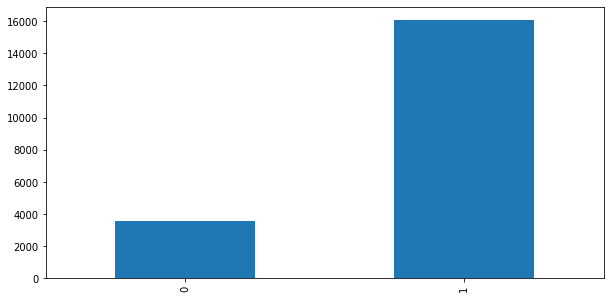

In [ ]:
df['Recommended IND'].value_counts().sort_index().plot(kind='bar',figsize=(10,5))

# text process

In [ ]:
from textblob import TextBlob
import string

In [ ]:
def process_text(x):
    text = x.lower()
    text = re.sub(r'\W+', ' ', text)
    b = TextBlob(text)
    res_cor = b.correct()
    #res = res.split(' ')
    tokens  = res_cor.split(' ')
    return res_cor, len(tokens)

In [ ]:
df['Review Text'][3]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [ ]:
re.sub(r'\W+', ' ', df['Review Text'][3])


'I love love love this jumpsuit it s fun flirty and fabulous every time i wear it i get nothing but great compliments '

In [ ]:
%%time
process_text(df['Review Text'][3])[0]

CPU times: user 284 ms, sys: 1e+03 ns, total: 284 ms
Wall time: 288 ms


TextBlob("i love love love this jumpsuit it s fun flirt and fabulous every time i wear it i get nothing but great compliments ")

In [ ]:
%%time
df['text_count'] = None
df['text'] = None
for idx in df.index:
  if idx % 1000 == 0:
    print(idx)
  if df['Title'][idx] != None:
    text_all = df['Title'][idx] +' ' + df['Review Text'][idx]
    temp_res = process_text(text_all)
    df['text'][idx] = str(temp_res[0])
    df['text_count'][idx] = temp_res[1]
  else:
    text_all = df['Review Text'][idx]
    temp_res = process_text(text_all)
    df['text'][idx] = str(temp_res[0])
    df['text_count'][idx] = temp_res[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1000
2000
3000
4000
6000
8000
9000
10000
11000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
CPU times: user 1h 26min 43s, sys: 10.5 s, total: 1h 26min 54s
Wall time: 1h 27min 1s


In [ ]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_count,text
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,101,some major design flaws i had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,27,my favorite buy i love love love this jumpsuit...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,39,flattering shirt this shirt is very flattering...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,104,not for the very petite i love trace geese dre...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,103,charcoal swimmer fun i added this in my basket...


In [ ]:
tb = df.text_count.value_counts().to_frame().reset_index().rename(columns={'index':'text_num','text_count':'cnt'})
tb['percent']=tb['cnt']/len(df)
tb['cumsum_']=tb['percent'].cumsum()
print(tb.shape)


(122, 4)


In [ ]:
tb[tb.cumsum_ < 0.70]

,text_num,cnt,percent,cumsum_
0,103,397,0.020178,0.020178
1,105,390,0.019822,0.040000
2,104,384,0.019517,0.059517
3,102,372,0.018907,0.078424
4,101,343,0.017433,0.095858
...,...,...,...,...
56,29,176,0.008945,0.660025
57,76,175,0.008895,0.668920
58,63,175,0.008895,0.677814
59,65,172,0.008742,0.686557


In [ ]:
df["Division"] = df["Division Name"].astype('category')
df["Division"] = df["Division"].cat.codes

df["Department"] = df["Department Name"].astype('category')
df["Department"] = df["Department"].cat.codes

df["Class"] = df["Class Name"].astype('category')
df["Class"] = df["Class"].cat.codes

In [ ]:
df.to_csv('df_clean.csv',index = False)

NameError: ignored

In [ ]:
### after clean

In [ ]:
df = pd.read_csv('df_clean_2.csv')

In [ ]:
docs = list(df.text)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
word_index = tokenizer.word_index

In [ ]:
len(word_index)

10164

In [ ]:
MAX_LEN = 90
DOC_NUM = len(df)
MAX_WORDS = 9000

In [ ]:
text_w2v = []
for d in df.text:
  temp_ = d.split(' ')
  text_w2v += [temp_]

In [ ]:
EMBEDDING_DIM = 100
w2v_model = Word2Vec(text_w2v, window=5, min_count=1, size=EMBEDDING_DIM)
w2v_model.save('w2v_model.model')

In [ ]:

def generate_seq(docs, DOC_NUM, MAX_LEN, MAX_WORDS, word_index):
  sequences = np.zeros((DOC_NUM, MAX_LEN))
  print(sequences.shape)
  for i, doc in enumerate(docs):
    wordTokens = text_to_word_sequence(doc)
    #print(wordTokens)
    for j, word in enumerate(wordTokens):
      #print(word)
      if j < MAX_LEN and word_index[word]< MAX_WORDS:
        sequences[i,j] = word_index[word] 
  return sequences

In [ ]:
sequences = generate_seq(docs, DOC_NUM, MAX_LEN, MAX_WORDS, word_index)

(19675, 90)


In [ ]:
def generate_embedding(EMBEDDING_DIM, MAX_WORDS, word_index, w2v_model):
  embedding_matrix = np.zeros(((MAX_WORDS + 1), EMBEDDING_DIM))
  ignored=[]
  cnt=0
  for word, i in word_index.items():
    if (word in w2v_model.wv.vocab) & (i <= MAX_WORDS):
        #print(word)
        embedding_vector = w2v_model[word]
        cnt+=1
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    else: 
      ignored.append(word)
      #print(word)
  print(cnt)
  print(ignored[0:10])
  print(len(ignored))
  return embedding_matrix

In [ ]:
embedding = generate_embedding(EMBEDDING_DIM, MAX_WORDS, word_index, w2v_model)

9000
['withhold', 'minority', 'cartagena', 'cinnamon', 'nigh', 'ruggedness', 'sonya', 'onion', 'temple', 'chafe']
1164


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
embedding

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.18607557, -1.50915062,  0.55232662, ..., -0.61237246,
         0.78833687, -0.97682232],
       [ 0.14174704,  0.7408818 ,  0.14898859, ...,  0.04212448,
        -0.46405205,  1.71712172],
       ...,
       [ 0.00415188,  0.01800941, -0.00575012, ...,  0.01630626,
        -0.00463857,  0.01916233],
       [ 0.02213289,  0.01694503,  0.02062245, ...,  0.01306334,
         0.01430427, -0.0047638 ],
       [ 0.03091051, -0.00616094, -0.00776239, ..., -0.00230698,
         0.00884753, -0.00542801]])

In [ ]:
np.save('embedding', embedding)

In [ ]:
data = sequences

In [ ]:
np.save('data', sequences)

# Modeling

In [ ]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers

from keras import optimizers

from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Input, Flatten, Concatenate, \
                          Conv2D, GlobalAveragePooling1D, LSTM, GRU, Bidirectional, dot, multiply, Lambda, TimeDistributed, Masking

from keras.models import Model, Sequential
from keras.regularizers import l2,l1,l1_l2
from keras.callbacks import Callback,EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight
from keras.initializers import Constant
from keras import metrics

from keras.callbacks import Callback

from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, classification_report,accuracy_score, auc, roc_curve, roc_auc_score, average_precision_score


In [ ]:
MAX_LEN = 90
DOC_NUM = len(df)
MAX_WORDS = 9000
EMBEDDING_DIM = 100
l12_reg = l1_l2(l1 = 1e-6,l2 = 1e-6)
BATCH_SIZE = 24

In [ ]:
def performance_measure(pred_yp, y):
    '''
    Given lists of predicted y probability and x, y, return a dataframe of AR, AUC, Brier, Decile Table
    '''
    
    tenc_dat = pd.DataFrame({'y_true':y,'probability':pred_yp.flatten()})
    tenc_dat.sort_values('probability',axis = 0,ascending=False, inplace = True)
    tenc_dat.index = range(0,len(tenc_dat))
    y = tenc_dat['y_true']
    point = float(len(tenc_dat))/10
    point = int(round(point))
    tenc = []
    for i in range(0,10):
        tenc.append(y[(i*point):((i+1)*point)])
    tenc[9]=tenc[9].append(y[10*point:])
    total = sum(y)
    num_of_bkr = []
    for j in range(0,10):
        num_of_bkr.append(sum(tenc[j]))
    tencile_bkr = np.array(num_of_bkr)
    rate = tencile_bkr.astype(float)/total

    return rate

In [ ]:
class AUCEvaluation(Callback):
    """ Show AUC after interval number of epoches """
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            logs['auc'] = score
            tencile=performance_measure(y_pred, self.y_val)
            logs['tencile'] = tencile
            print(" epoch:{:d} auc: {:.4f}".format(epoch, score))


In [ ]:
class AttLayer(Layer):
    
    def __init__(self, regularizer=None,context_dim=100, name="attention",**kwargs):
        self.regularizer = regularizer
        self.context_dim=context_dim
        self.supports_masking = True
        self._name=name
        super(AttLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3        
        self.W = self.add_weight(name='W', shape=(input_shape[-1], self.context_dim), initializer='normal', trainable=True, 
                                 regularizer=self.regularizer)
        self.b = self.add_weight(name='b', shape=(self.context_dim,), initializer='normal', trainable=True, 
                                 regularizer=self.regularizer)
        self.u = self.add_weight(name='u', shape=(self.context_dim,), initializer='normal', trainable=True, 
                                 regularizer=self.regularizer)        
        super(AttLayer, self).build(input_shape)  # be sure you call this somewhere!

    def call(self, x, mask=None):
        eij = K.tanh(K.dot(x, self.W) + self.b)
        eij = K.squeeze(K.dot(eij, K.expand_dims(self.u, axis=1)), axis=-1)
        ai = K.exp(eij)

        
        if mask is not None:
            ai*=K.cast(mask, K.floatx())
            
        ai /=K.cast(K.sum(ai, axis=1, keepdims=True)+K.epsilon(), K.floatx())

        return ai
        

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1])
    
    def get_config(self):
        config = {}
        base_config = super(AttLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_mask(self, inputs, mask):
        return None  

In [ ]:

class WeightedSum(Layer):
    def __init__(self, name="weighted_sum",  **kwargs):
        self.supports_masking = True
        self._name=name
        super(WeightedSum, self).__init__(**kwargs)
        
    def build(self, input_shape):
        super(WeightedSum, self).build(input_shape)  # Be sure to call this at the end


    def call(self, input_tensor, mask=None):
        
        x = input_tensor[0]
        #print("input",K.int_shape(x))
        a = input_tensor[1]
        print("weights", K.int_shape(a))

        a = K.expand_dims(a)
        weighted_input = K.sum(x * a, axis=1)
        #print("weighted sum",K.int_shape(weighted_input))
        
        return weighted_input

    def compute_output_shape(self, input_shape):
        
        a, b = input_shape
        
        return (a[0], a[-1])

    def compute_mask(self, x, mask=None):
        return None


In [ ]:

def basicModel(embedding_matrix, MAX_WORDS, MAX_LEN, EMBEDDING_DIM):
    embedding_layer = Embedding( MAX_WORDS+ 1,
                        EMBEDDING_DIM,
                        embeddings_initializer = Constant(embedding_matrix),
                        mask_zero=True,
                        input_length=MAX_LEN,
                        trainable=False)    
    
    
    text_input = Input(shape=(MAX_LEN, ), dtype='int32')
    embedded_sequences = embedding_layer(text_input)
    lstm = LSTM(27, return_sequences=True,\
                  implementation=2, \
                  recurrent_dropout = 0.2,
                  dropout=0.2)(embedded_sequences)
    drop_out = Dropout(0.2)(lstm)
    att = AttLayer(regularizer = l12_reg)(lstm)
    weighted_sum = WeightedSum()([drop_out,att])

    preds = Dense(1, activation='sigmoid',kernel_regularizer=l12_reg)(weighted_sum) 

    model = Model(text_input, preds)
    model.summary()
    
    return model

In [ ]:
def fit_model( model, train_x, train_y, val_x, val_y, test_x, test_y, model_name, verbose = 0):
    
    history = None
    result = None
    
    model_df = model
    print('in fit, val_y: ', sum(val_y), 'test_y',sum(test_y), 'train_y',sum(train_y))

    #class weight for train 
    class_weights = class_weight.compute_class_weight('balanced',
                              np.unique(train_y),
                              train_y)
    class_weights = {l:c for l,c in zip(np.unique(np.ravel(train_y,order='C')), class_weights)}
    print('in fit train weights', class_weights)

    # class weight for val
    val_class_weights = class_weight.compute_class_weight('balanced',
                                np.unique(val_y),
                                val_y)
    val_class_weights = {l:c for l,c in zip(np.unique(val_y), val_class_weights)}
    val_sample_weights = []
    for y in np.ravel(val_y,order='C'):
        if y == 1:
          val_sample_weights.append(val_class_weights[1])
        else: val_sample_weights.append(val_class_weights[0])
    val_sample_weights = np.asarray(val_sample_weights)
    print('in fit val weights', val_sample_weights.shape)
    
    auc_eval = AUCEvaluation(validation_data=(val_x, val_y), interval=1)
    earlyStopping = EarlyStopping(monitor='val_my_auc',patience = 3, 
                      verbose =verbose, mode ='max')
    checkpoint = ModelCheckpoint(model_name,monitor='val_my_auc',verbose=verbose,
              save_best_only=True, save_weights_only=True, mode ='max')

    opt = optimizers.RMSprop(lr=0.0005)
    model_df.compile(optimizer= opt,
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.AUC(name='my_auc')])

    history = model_df.fit(train_x,
                train_y,
                epochs=200,
                batch_size=128,
                verbose =verbose,
                #callbacks=[auc_eval],\
                callbacks=[auc_eval, earlyStopping, checkpoint], #checkpoint
                class_weight = class_weights, \
                validation_data=(val_x, val_y, val_sample_weights)) 
    model_df.save(model_name+".h5")
        
    return history, auc_score, fpr, tpr, thresholds, [test_y, y_pred_1]

In [ ]:
def cross_val(data, label, name, embedding, MAX_WORD, MAX_LEN, EMBEDDING_DIM):
    tprs = []
    auc_list = []
    mean_fpr = np.linspace(0,1,100)
    predicted_res =[]
    his_auc = []
    test_index_order = []

    kf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)
    c = 0

    
    for train_all_index, test_index in kf.split(range(data.shape[0]), label):
        
        c += 1
        
        
        model = basicModel(embedding, MAX_WORDS, MAX_LEN, EMBEDDING_DIM)
    
        #model = model_lstm(n1,n2,n,w)
        train_x_index, train_val_index = train_test_split(train_all_index,test_size=0.2, \
                    random_state=42, stratify = label[train_all_index])
        
        train_x = data[train_x_index]
        train_y = label[train_x_index]

        val_x = data[train_val_index]
        val_y = label[train_val_index]

        test_x = data[test_index]
        test_y = label[test_index]

        print(' train_x:',train_x.shape, ' val_x:',val_x.shape, ' val_x:',test_x.shape )

        mod_res = fit_model(model, train_x, train_y, val_x, val_y, test_x, test_y,\
                  name+'_'+str(c))
        his_auc.append(mod_res[0].history['val_my_auc'])
        
        
        
        
        auc_list.append(mod_res[1])
        tprs.append(np.interp(mean_fpr, mod_res[2], mod_res[3]))
        temp_pred_res = [mod_res[-1],test_index]
        print(len(test_index))
        predicted_res.append(temp_pred_res)
        
        test_index_order.append(test_index)

    mean_tpr = np.mean(tprs, axis=0)
    print('avg_AUC : ', np.mean(auc_list))
    print('avg_AUC_2 : ', auc(mean_fpr, mean_tpr))
    print(pd.DataFrame(his_auc))
    print(pd.DataFrame(his_auc).mean())
    
    return np.average(auc_list), mean_tpr, predicted_res, test_index_order

In [ ]:
label = np.asarray(df['Recommended IND'])

In [ ]:
data

array([[ 163., 1794.,  138., ...,  138., 1474.,   17.],
       [  18.,  297.,  232., ...,    0.,    0.,    0.],
       [  52.,   72.,    7., ...,    0.,    0.,    0.],
       ...,
       [  36.,   10.,  129., ...,    0.,    0.,    0.],
       [  25.,   36.,   16., ...,    3.,    2.,  238.],
       [ 748.,  204.,   58., ...,    0.,    0.,    0.]])

weights (None, 90)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 90)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 90, 100)      900100      input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 90, 27)       13824       embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 90, 27)       0           lstm_1[0][0]                     
_________________________________________________________________________

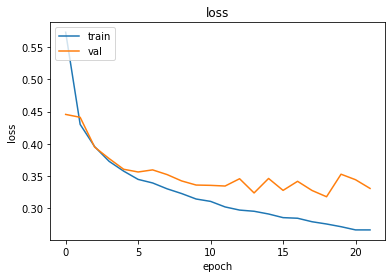

4919
weights (None, 90)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 90)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 90, 100)      900100      input_3[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 90, 27)       13824       embedding_2[0][0]                
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 90, 27)       0           lstm_2[0][0]                     
____________________________________________________________________

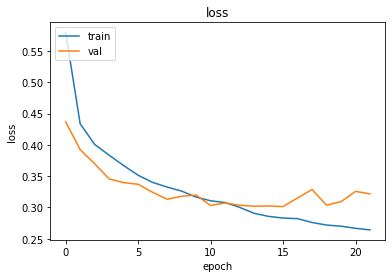

4919
weights (None, 90)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 90)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 90, 100)      900100      input_4[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 90, 27)       13824       embedding_3[0][0]                
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 90, 27)       0           lstm_3[0][0]                     
____________________________________________________________________

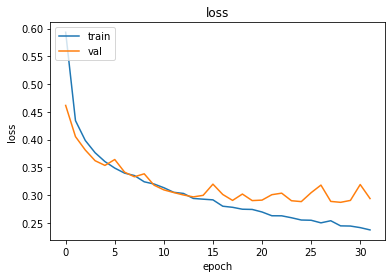

4919
weights (None, 90)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 90)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 90, 100)      900100      input_5[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 90, 27)       13824       embedding_4[0][0]                
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 90, 27)       0           lstm_4[0][0]                     
____________________________________________________________________

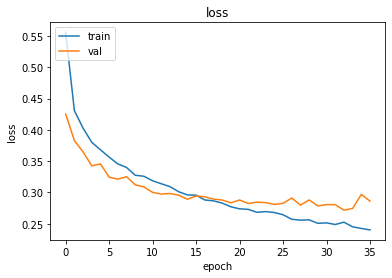

4918
avg_AUC :  0.9424409223597272
avg_AUC_2 :  0.9423844030365769
         0         1         2   ...        33        34        35
0  0.874711  0.894303  0.907095  ...       NaN       NaN       NaN
1  0.885966  0.903045  0.916383  ...       NaN       NaN       NaN
2  0.871909  0.897043  0.911033  ...       NaN       NaN       NaN
3  0.890426  0.908171  0.919614  ...  0.955072  0.953684  0.953974

[4 rows x 36 columns]
0     0.880753
1     0.900640
2     0.913531
3     0.920878
4     0.925339
5     0.928632
6     0.931331
7     0.933849
8     0.935516
9     0.936876
10    0.939296
11    0.940299
12    0.940786
13    0.942023
14    0.942480
15    0.943554
16    0.943404
17    0.943344
18    0.945245
19    0.944848
20    0.944657
21    0.945403
22    0.950883
23    0.950353
24    0.950852
25    0.951545
26    0.950997
27    0.951884
28    0.951945
29    0.952451
30    0.951626
31    0.952517
32    0.956058
33    0.955072
34    0.953684
35    0.953974
dtype: float64


In [ ]:
auc_list, mean_tpr, predicted_res, test_index_order = cross_val(data, label, 'han', embedding, MAX_WORDS, MAX_LEN, EMBEDDING_DIM)

In [ ]:
>>> import pickle

In [ ]:

>>>
>>> with open("test_index_order.txt", "wb") as fp:
...   pickle.dump(test_index_order, fp)

In [ ]:
>>> with open("word_index.txt", "wb") as fp:
...   pickle.dump(word_index, fp)

# Analysis

In [ ]:
# data = np.load('data.npy')
# embedding = np.load('embedding.npy')

In [ ]:
# >>> with open('test_index_order.txt', "rb") as fp:   # Unpickling
# ...   test_index_order = pickle.load(fp)

In [ ]:
model = basicModel(embedding, MAX_WORDS, MAX_LEN, EMBEDDING_DIM)

weights (None, 90)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 90)]         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 90, 100)      900100      input_6[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 90, 27)       13824       embedding_5[0][0]                
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 90, 27)       0           lstm_5[0][0]                     
_________________________________________________________________________

In [ ]:
import tensorflow
#tensorflow.compat.v1.disable_eager_execution()
from tensorflow.python.keras.backend import eager_learning_phase_scope

In [ ]:
res = pd.DataFrame(columns=['idx','data','weights'])
get_att = K.function([model.input],[model.layers[4].output])
for c in [1,2,3,4]:
  model.load_weights('han_'+str(c)+'.h5')
  data_test = data[test_index_order[c-1]]
  with eager_learning_phase_scope(value=0):
    layers = [get_att([data_test[i:i+ 128]]) for i in range(0, len(data_test), 128)]
    layers_flat = []
    for a in layers:
      for aa in a[0]:
        layers_flat.append(aa)
        
  for i in np.arange(len(test_index_order[c-1])):
    res = res.append(pd.DataFrame({'idx': test_index_order[c-1][i], 'data': [data[test_index_order[c-1][i]]], 'weights': [layers_flat[i]]}))

In [ ]:
res.to_csv('attention_result.csv',index=False)

In [ ]:
res.head()




,idx,data,weights
0,3,"[19.0, 12.0, 1.0, 25.0, 91.0, 2.0, 20.0, 1846....","[0.040760167, 0.06857426, 0.017609911, 0.01233..."
0,5,"[1106.0, 927.0, 415.0, 14.0, 559.0, 2.0, 60.0,...","[0.023626607, 0.02280329, 0.030459424, 0.06419..."
0,7,"[320.0, 5.0, 211.0, 16.0, 2.0, 35.0, 43.0, 43....","[0.09773841, 0.019008406, 0.0631164, 0.0958843..."
0,8,"[16.0, 79.0, 30.0, 4.0, 23.0, 114.0, 13.0, 474...","[0.0073302165, 0.0060432954, 0.014174643, 0.01..."
0,16,"[364.0, 3.0, 66.0, 2.0, 20.0, 1.0, 55.0, 3.0, ...","[0.044403583, 0.027346333, 0.06585234, 0.49293..."


In [ ]:
res.data.iloc[1][0]

1106.0

In [ ]:
res.weights.iloc[1][0]

0.023626607

In [ ]:
res.append(pd.DataFrame({'idx': test_index_order[1-1][1], 'data': [data[test_index_order[c-1][1]]], 'weights': [layers_flat[1]]}))

,idx,data,weights
0,5,"[83.0, 739.0, 16.0, 14.0, 163.0, 733.0, 7.0, 6...","[0.16423461, 0.09868156, 0.047125824, 0.051872..."


In [ ]:
df.shape

(19675, 15)

In [ ]:
df.text.iloc[3]

'not for the very petite i love trace geese dresses but this one is not for the very petite i am just under 5 feet tall and usually wear a up in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress '

In [ ]:
res['word_important_order'] = None
res = res.reset_index(drop=True)

In [ ]:
res

,idx,data,weights,word_important_order
0,3,"[19.0, 12.0, 1.0, 25.0, 91.0, 2.0, 20.0, 1846....","[0.040760167, 0.06857426, 0.017609911, 0.01233...",None
1,5,"[1106.0, 927.0, 415.0, 14.0, 559.0, 2.0, 60.0,...","[0.023626607, 0.02280329, 0.030459424, 0.06419...",None
2,7,"[320.0, 5.0, 211.0, 16.0, 2.0, 35.0, 43.0, 43....","[0.09773841, 0.019008406, 0.0631164, 0.0958843...",None
3,8,"[16.0, 79.0, 30.0, 4.0, 23.0, 114.0, 13.0, 474...","[0.0073302165, 0.0060432954, 0.014174643, 0.01...",None
4,16,"[364.0, 3.0, 66.0, 2.0, 20.0, 1.0, 55.0, 3.0, ...","[0.044403583, 0.027346333, 0.06585234, 0.49293...",None
...,...,...,...,...
19670,19668,"[52.0, 2.0, 17.0, 506.0, 49.0, 1.0, 1440.0, 15...","[0.03934036, 0.08058521, 0.024694284, 0.082041...",None
19671,19669,"[165.0, 5.0, 211.0, 178.0, 15.0, 2.0, 296.0, 2...","[0.022172699, 0.011383755, 0.07410861, 0.06178...",None
19672,19670,"[29.0, 16.0, 12.0, 203.0, 1046.0, 2.0, 17.0, 2...","[0.044185944, 0.02425993, 0.03599548, 0.075247...",None
19673,19672,"[36.0, 10.0, 129.0, 208.0, 7.0, 28.0, 69.0, 10...","[0.07489003, 0.0074996953, 0.010097302, 0.0175...",None


In [ ]:
for res_idx in res.index:
  rank = np.argsort(res.weights.loc[res_idx])[::-1]
  word_important = []
  for r in rank:
    rank_wrdidx = res.data.loc[res_idx][r]
    word_important += [w for w,v in word_index.items() if v == rank_wrdidx]
  res.word_important_order.loc[res_idx] = word_important

In [ ]:
res.to_csv('word_importance_res.csv',index = False)

In [ ]:
df = pd.read_csv('df_clean_2.csv')

In [ ]:
res

,idx,data,weights,word_important_order
0,3,"[19.0, 12.0, 1.0, 25.0, 91.0, 2.0, 20.0, 1846....","[0.040760167, 0.06857426, 0.017609911, 0.01233...","[would, for, out, full, not, idea, petite, tra..."
1,5,"[1106.0, 927.0, 415.0, 14.0, 559.0, 2.0, 60.0,...","[0.023626607, 0.02280329, 0.030459424, 0.06419...","[i, this, lots, with, goes, ordered, swimmer, ..."
2,7,"[320.0, 5.0, 211.0, 16.0, 2.0, 35.0, 43.0, 43....","[0.09773841, 0.019008406, 0.0631164, 0.0958843...","[i, such, dress, fun, m, 5, love, a, les, i, 5..."
3,8,"[16.0, 79.0, 30.0, 4.0, 23.0, 114.0, 13.0, 474...","[0.0073302165, 0.0060432954, 0.014174643, 0.01...","[back, cheap, disappointed, material, made, ch..."
4,16,"[364.0, 3.0, 66.0, 2.0, 20.0, 1.0, 55.0, 3.0, ...","[0.044403583, 0.027346333, 0.06585234, 0.49293...","[i, love, comfortable, stylish, the, and, i, l..."
...,...,...,...,...
19670,19668,"[52.0, 2.0, 17.0, 506.0, 49.0, 1.0, 1440.0, 15...","[0.03934036, 0.08058521, 0.024694284, 0.082041...","[return, surprised, i, at, the, great, flatter..."
19671,19669,"[165.0, 5.0, 211.0, 178.0, 15.0, 2.0, 296.0, 2...","[0.022172699, 0.011383755, 0.07410861, 0.06178...","[i, i, fun, i, so, piece, true, 2, 5, what, i,..."
19672,19670,"[29.0, 16.0, 12.0, 203.0, 1046.0, 2.0, 17.0, 2...","[0.044185944, 0.02425993, 0.03599548, 0.075247...","[this, happy, i, many, to, occasions, great, s..."
19673,19672,"[36.0, 10.0, 129.0, 208.0, 7.0, 28.0, 69.0, 10...","[0.07489003, 0.0074996953, 0.010097302, 0.0175...","[through, see, would, was, cut, well, never, f..."


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
merge = df.merge(res, left_index=True, right_on = 'idx')

In [ ]:
merge.to_csv('word_res_merge.csv',index=False)

In [ ]:
merge.text.iloc[100]

'pernetti henry in my retailer this was hung over in the pp section and it really has more of a jammed top feel soft thin and stretch it s super copy and comfortable and it draped really nice mine seems to have stretched out a little especially the decline and the little buttons have a hard time staying closed i m happy with it though for what it is a great casual day t '

In [ ]:
merge.word_important_order.iloc[100]

['comfortable',
 'nice',
 'mine',
 'with',
 'really',
 'copy',
 'and',
 'it',
 'draped',
 'casual',
 'pernetti',
 'and',
 'have',
 'it',
 'henry',
 'happy',
 'has',
 'out',
 'really',
 'have',
 'little',
 'seems',
 'great',
 'for',
 'super',
 'little',
 'day',
 's',
 'to',
 'thin',
 'it',
 'it',
 'my',
 'buttons',
 'feel',
 'especially',
 'soft',
 'though',
 'of',
 'is',
 'decline',
 'and',
 'it',
 'and',
 'stretch',
 'hard',
 'hung',
 'and',
 'pp',
 'section',
 'i',
 'more',
 'in',
 'm',
 'the',
 'what',
 'the',
 'was',
 'jammed',
 'stretched',
 'staying',
 'a',
 'the',
 'time',
 'closed',
 'over',
 'this',
 't',
 'a',
 'top',
 'a',
 'a',
 'retailer',
 'in']

In [ ]:
df.data.iloc[3] = res[res.idx == 3].data

ValueError: ignored

In [ ]:
df['data'] = None
df['weights'] = None
df['word_important_order'] = None
for idx_res in res.idx:
  df.loc[idx_res,'data'] = res[res.idx == idx_res].data
  df.loc[idx_res,'weights'] = res[res.idx == idx_res].weights
  df.loc[idx_res,'word_important_order'] = res[res.idx == idx_res].word_important_order

ValueError: ignored

In [ ]:
df['Recommended IND'].iloc[19668]

0

In [ ]:
df.text.iloc[19668]

'flattering i was surprised at the positive reviews for this product its terrible it cuts you in a weird place to make you look wide the skirt is also not like the picture its darker and heavier the material isn great i had to return '

In [ ]:
res.word_important_order[3]

['back',
 'cheap',
 'disappointed',
 'material',
 'made',
 'cheap',
 'was',
 'to',
 'small',
 'area',
 'material',
 'nipper',
 'where',
 'going',
 'tight',
 'it',
 'like',
 'of',
 'runs',
 'esp',
 'going',
 's',
 'runs',
 'even',
 'fabric',
 'will',
 'i',
 'that',
 'will',
 'pretty',
 'be',
 'be',
 'it',
 'dress',
 'feels',
 'cause',
 'my',
 'which',
 'the',
 'pulling',
 's',
 'looks',
 'the',
 'the',
 'as',
 'on',
 'and',
 'just',
 'looks',
 'was',
 'christmas',
 'ordered',
 'dress',
 'the',
 'to',
 'on',
 'very',
 'this',
 'needless',
 'me',
 'very',
 'top',
 'rip',
 'say',
 'it',
 'to',
 'the',
 'fits',
 'it',
 'typically',
 'and',
 'it',
 'year',
 'dress',
 'it']

In [ ]:
np.argmax(res.weights.iloc[0])

72

In [ ]:
res.data.iloc[0][72]

48.0

In [ ]:
for w, v in word_index.items():
  if v == :
    print(w)

bit


In [ ]:
80

In [ ]:
len(test_index_order[c-1])

4918

In [ ]:
model.load_weights('han_1.h5')

In [ ]:
model.input

<KerasTensor: shape=(None, 90) dtype=int32 (created by layer 'input_1')>

In [ ]:
from tensorflow.python.keras import backend as K

In [ ]:
get_att = K.function([model.input],[model.layers[4].output])

In [ ]:
data_test = data[test_index_order[0]]

In [ ]:
data_test[0][89]

1.0

In [ ]:
data_test[0][39]

70.0

In [ ]:
len(data_test)

4919

In [ ]:
with eager_learning_phase_scope(value=0):
  layers = [get_att([data_test[i:i+ 128]]) for i in range(0, len(data_test), 128)]
  layers_flat = []
  for a in layers:
    for aa in a[0]:
      clayers_flat.append(aa)


In [ ]:
len(layers)

39

In [ ]:
len(layers[0][0])

128

In [ ]:
c = []
for a in layers:
  print(len(a[0]))
  for aa in a[0]:
    c.append(aa)

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
55


In [ ]:
len(c)

4919

In [ ]:
layer_flt = []

In [ ]:
np.argmax(layers[0][0])

39

In [ ]:
df['Recommended IND'].value_counts()

1    16100
0     3575
Name: Recommended IND, dtype: int64

In [ ]:
df['Recommended IND'].iloc[test_index_order[0][0]]

0

In [ ]:
df['Rating'].iloc[test_index_order[0][0]]

2

In [ ]:
df.text.iloc[test_index_order[0][0]]

'not for the very petite i love trace geese dresses but this one is not for the very petite i am just under 5 feet tall and usually wear a up in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress '

In [ ]:
for w, v in word_index.items():
  if v == 1:
    print(w)

the


In [ ]:
df = pd.read_csv('word_res_merge.csv')

In [ ]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_count,text,Division,Department,Class,idx,data,weights,word_important_order
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,101,some major design flaws i had such high hopes ...,0,1,3,0,[1.630e+02 1.794e+03 1.380e+02 1.071e+03 2.000...,[3.13322479e-03 3.52106872e-03 6.87376969e-03 ...,"['wanted', 'was', 'cheap', 'for', 'had', 'flaw..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,27,my favorite buy i love love love this jumpsuit...,1,0,13,1,[ 18. 297. 232. 2. 20. 20. 20. ...,[0.00105703 0.00433241 0.00264576 0.01401595 0...,"['this', 'it', 'i', 'love', 'every', 'jumpsuit..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,39,flattering shirt this shirt is very flattering...,0,4,0,2,[5.200e+01 7.200e+01 7.000e+00 7.200e+01 6.000...,[0.01782822 0.02401865 0.02065554 0.0294563 0...,"['this', 'love', 'with', 'cardiac', 'well', 'w..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,104,not for the very petite i love trace geese dre...,0,1,3,3,[1.900e+01 1.200e+01 1.000e+00 2.500e+01 9.100...,[0.04076017 0.06857426 0.01760991 0.01233032 0...,"['would', 'for', 'out', 'full', 'not', 'idea',..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,103,charcoal swimmer fun i added this in my basket...,1,4,8,4,[1.593e+03 1.106e+03 2.110e+02 2.000e+00 7.650...,[1.40671069e-02 1.16423341e-02 5.16614467e-02 ...,"['i', 'this', 'fun', 'my', 'in', 'it', 'added'..."


In [ ]:
from ast import literal_eval

In [ ]:
df.word_important_order = df.word_important_order.apply(lambda x: eval(x))

In [ ]:
df

In [ ]:
from collections import Counter

In [ ]:

df_dress_0 = df[(df['Class Name'] ==  'Dresses') &(df['Recommended IND'] ==  0)& (df['Rating'] ==  1)]
df_dress_1 = df[(df['Class Name'] ==  'Dresses') &(df['Recommended IND'] ==  1)& (df['Rating'] ==  5)]

In [ ]:
w_list = []
for ws in df_dress_0.word_important_order:
  w_list += ws[0:10]
cnt = Counter(w_list)
list(dict(sorted(cnt.items(), key=lambda item: item[1],reverse=True)))[0:100]

['was',
 'i',
 'the',
 'this',
 'disappointed',
 'like',
 'not',
 'for',
 'dress',
 'cheap',
 'looked',
 'back',
 'it',
 'no',
 'very',
 'excited',
 'had',
 'look',
 'cut',
 'huge',
 'bad',
 'fit',
 'to',
 'would',
 'poor',
 'looks',
 'fabric',
 'but',
 'didn',
 'is',
 'off',
 'so',
 'much',
 'material',
 'doesn',
 'way',
 'up',
 'too',
 'did',
 't',
 'made',
 'flattering',
 'wanted',
 'my',
 'good',
 'worth',
 'just',
 'because',
 'of',
 'pretty',
 'going',
 'high',
 'couldn',
 'out',
 'there',
 'me',
 'make',
 'sack',
 'great',
 'see',
 'terrible',
 'returned',
 'really',
 'quality',
 'return',
 's',
 'and',
 'felt',
 'on',
 'big',
 'beautiful',
 'well',
 'looking',
 'different',
 'when',
 'one',
 'something',
 'odd',
 'tight',
 'nice',
 'an',
 'tent',
 'could',
 'price',
 'don',
 'with',
 'should',
 'are',
 'will',
 'only',
 'put',
 'at',
 'get',
 'completely',
 'after',
 'disappointing',
 'ran',
 'all',
 'design',
 'right']

In [ ]:
w_list = []
for ws in df_dress_1.word_important_order:
  w_list += ws[0:10]
cnt = Counter(w_list)
list(dict(sorted(cnt.items(), key=lambda item: item[1],reverse=True)))[0:100]

['i',
 'this',
 'dress',
 'love',
 'it',
 'with',
 'beautiful',
 'the',
 'great',
 'perfect',
 'and',
 'wear',
 'flattering',
 'comfortable',
 'to',
 'or',
 'is',
 'for',
 'summer',
 'up',
 'my',
 'gorgeous',
 'cut',
 'a',
 'so',
 'was',
 'down',
 'fall',
 'work',
 'size',
 'like',
 'pretty',
 'in',
 'can',
 'very',
 'well',
 'compliments',
 'true',
 'easy',
 'fun',
 'lovely',
 'boots',
 'be',
 'come',
 'fit',
 'dressed',
 'perfectly',
 'bought',
 'have',
 'amazing',
 'versatile',
 'absolutely',
 'soft',
 'runs',
 'happy',
 's',
 'nice',
 'unique',
 'favorite',
 'casual',
 'many',
 'good',
 'spring',
 'adorable',
 'recommend',
 'worn',
 'stunning',
 'super',
 '5',
 'wedding',
 'but',
 'wearing',
 'look',
 'not',
 'go',
 'of',
 'would',
 'classic',
 'feminine',
 'its',
 'fits',
 'elegant',
 'just',
 'new',
 'will',
 'really',
 'black',
 'back',
 'piece',
 'dooties',
 'winter',
 'an',
 'wait',
 'made',
 'quality',
 'high',
 'had',
 'you',
 'jacket',
 'beautifully']

In [ ]:
df_pants_0 = df[(df['Class Name'] ==  'Pants') & (df['Recommended IND'] ==  0) & (df['Rating'] ==  1)]
df_pants_1 = df[(df['Class Name'] ==  'Pants') &(df['Recommended IND'] ==  1)& (df['Rating'] ==  5)]

In [ ]:
w_list = []
for ws in df_pants_0.word_important_order:
  w_list += ws[0:10]
cnt = Counter(w_list)
list(dict(sorted(cnt.items(), key=lambda item: item[1],reverse=True)))[0:100]

['them',
 'i',
 'after',
 'disappointed',
 'was',
 'parts',
 'for',
 'not',
 'to',
 'the',
 'were',
 'this',
 'looked',
 'like',
 'terrible',
 'very',
 'washed',
 'quality',
 'had',
 'cheap',
 'bad',
 'no',
 'would',
 'wanted',
 'out',
 'and',
 'all',
 'what',
 'two',
 'hang',
 'a',
 'still',
 'now',
 'back',
 'going',
 'great',
 'thin',
 'excited',
 'look',
 'off',
 'well',
 'go',
 'worn',
 'an',
 'summed',
 'little',
 'travel',
 'could',
 'washing',
 'should',
 'much',
 'can',
 'return',
 'up',
 'unfortunately',
 'so',
 'stain',
 'sad',
 'money',
 'there',
 'wash',
 'comfortable',
 'flattering',
 'did',
 'fabric',
 'poor',
 'because',
 'regained',
 'dry',
 'then',
 'problem',
 'shape',
 'crutch',
 'get',
 'closely',
 'ran',
 'watch',
 'colored',
 'material',
 'flies',
 'at',
 'others',
 'wrong',
 'stitching',
 'noticed',
 'falls',
 'looking',
 'apart',
 'on',
 'ridiculous',
 'unfortunate',
 'way',
 'feeling',
 'sadly',
 'pretty',
 're',
 'have',
 'weird',
 'down',
 'from']

In [ ]:
w_list = []
for ws in df_pants_1.word_important_order:
  w_list += ws[0:10]
cnt = Counter(w_list)
list(dict(sorted(cnt.items(), key=lambda item: item[1],reverse=True)))[0:100]

['i',
 'love',
 'parts',
 'these',
 'great',
 'this',
 'perfect',
 'comfortable',
 'with',
 'and',
 'for',
 'to',
 'summer',
 'or',
 'the',
 'wear',
 'it',
 'up',
 'cut',
 'flattering',
 'down',
 'come',
 'my',
 'jumpsuit',
 'fit',
 'so',
 'nice',
 'casual',
 'a',
 'beautiful',
 'them',
 'true',
 'bought',
 'like',
 'can',
 'work',
 'is',
 'was',
 'very',
 'size',
 'well',
 'soft',
 'go',
 'dressed',
 'fun',
 'recommend',
 'favorite',
 'amazing',
 'stylish',
 'versatile',
 'have',
 'quality',
 'super',
 'they',
 'be',
 'good',
 'pair',
 '5',
 'are',
 'look',
 'of',
 'easy',
 'perfectly',
 'fall',
 'staple',
 'in',
 'spring',
 'new',
 'compliments',
 'part',
 'adorable',
 'am',
 'get',
 'will',
 'micro',
 'unique',
 'back',
 'happy',
 'ordered',
 'heels',
 'piece',
 'wearing',
 'many',
 'you',
 'not',
 'tried',
 'lovely',
 'gorgeous',
 'got',
 'chins',
 'now',
 'highly',
 'wait',
 'absolutely',
 'pretty',
 'all',
 'worn',
 'everything',
 'but',
 'really']

In [ ]:
df[(df['Department Name'] ==  'Dresses') &(df['Recommended IND'] ==  1)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_count,text,Division,Department,Class,idx,data,weights,word_important_order
6,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,36,flattering i love this dress i usually get an ...,0,1,3,6,[5.200e+01 2.000e+00 2.000e+01 7.000e+00 1.600...,[0.01202566 0.02463349 0.02645856 0.16591688 0...,"[i, this, retailer, with, flattering, size, st..."
7,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,81,such a fun dress i m 5 5 and 125 les i ordered...,0,1,3,7,[320. 5. 211. 16. 2. 35. 43. 43. 3. ...,[9.77384076e-02 1.90084055e-02 6.31164014e-02 ...,"[i, such, dress, fun, m, 5, love, a, les, i, 5..."
9,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,96,perfect more and more i find myself radiant on...,1,1,3,9,[5.100e+01 5.800e+01 3.000e+00 5.800e+01 2.000...,[0.16348608 0.03542707 0.0329315 0.01785782 0...,"[perfect, i, very, find, just, more, and, fall..."
11,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses,102,pretty party dress with some issues this is a ...,0,1,3,11,[8.300e+01 7.390e+02 1.600e+01 1.400e+01 1.630...,[0.19395846 0.11452515 0.03405561 0.0541827 0...,"[pretty, party, with, i, dress, office, well, ..."
16,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,1,0,General,Dresses,Dresses,63,stylish and comfortable i love the look and fe...,0,1,3,16,[3.640e+02 3.000e+00 6.600e+01 2.000e+00 2.000...,[4.4403583e-02 2.7346333e-02 6.5852337e-02 4.9...,"[i, love, comfortable, stylish, the, and, i, l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,33,cut dress cut dress but not for me the waist i...,1,1,3,19665,[ 36. 16. 36. 16. 10. 19. 12. 32. 1. ...,[0.06899631 0.06535475 0.07730891 0.08683242 0...,"[but, dress, cut, cut, would, dress, for, not,..."
19667,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,88,enhancing i m so impressed with the beautiful ...,1,1,3,19667,[3.182e+03 2.000e+00 3.500e+01 1.500e+01 1.190...,[0.01500219 0.01608168 0.00066035 0.00278814 0...,"[point, price, ran, sheer, disappointed, espec..."
19670,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,35,great dress for many occasions i was very happ...,1,1,3,19670,[ 29. 16. 12. 203. 1046. 2. 17. 2...,[0.04418594 0.02425993 0.03599548 0.07524706 0...,"[this, happy, i, many, to, occasions, great, s..."
19673,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,97,very cut dress perfect for summer parties and ...,0,1,3,19673,[2.500e+01 3.600e+01 1.600e+01 5.100e+01 1.200...,[0.01883137 0.03581895 0.00775208 0.03087867 0...,"[this, this, i, i, summer, bought, parties, cu..."


In [ ]:
df['Review Text'][6]

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [ ]:
df['Recommended IND'][6]

1

In [ ]:
df['word_important_order'][6]

['i',
 'this',
 'retailer',
 'with',
 'flattering',
 'size',
 'style',
 'love',
 'dress',
 'the',
 'i',
 'feminine',
 'runs',
 'i',
 'for',
 'usual',
 'a',
 'little',
 'flair',
 'very',
 'and',
 'flattering',
 'an',
 'ordered',
 'a',
 'it',
 'snug',
 'usually',
 'up',
 'get',
 'is',
 'so',
 'but',
 'bust',
 'in']